In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('Airfair.csv')

In [3]:
df

,Journey_date,Journey_day,Days_left,Airline,Flight_Number,Class,Departure_time,Departure_loc,Destination_time,Destination_loc,Duration,Total Stops,Price
0,2023-01-16,Monday,1,SpiceJet,SG-8169,ECONOMY,08:00:PM,Delhi,10:05:PM,Mumbai,02h 05m,non-stop,5335
1,2023-01-16,Monday,1,Indigo,6E-2519,ECONOMY,11:00:PM,Delhi,01:20:AM,Mumbai,02h 20m,non-stop,5899
2,2023-01-16,Monday,1,GO FIRST,G8- 354,ECONOMY,10:30:PM,Delhi,12:40:AM,Mumbai,02h 10m,non-stop,5801
3,2023-01-16,Monday,1,SpiceJet,SG-8709,ECONOMY,06:50:PM,Delhi,08:55:PM,Mumbai,02h 05m,non-stop,5794
4,2023-01-16,Monday,1,Air India,AI-805,ECONOMY,08:00:PM,Delhi,10:10:PM,Mumbai,02h 10m,non-stop,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,50,Vistara,UK-926,BUSINESS,06:45:AM,Ahmedabad,07:50:PM,Chennai,13h 05m,1-stop,65028
452084,2023-03-06,Monday,50,Vistara,UK-918,BUSINESS,05:05:AM,Ahmedabad,04:20:PM,Chennai,11h 15m,1-stop,69254
452085,2023-03-06,Monday,50,Vistara,UK-918,BUSINESS,05:05:AM,Ahmedabad,04:20:PM,Chennai,11h 15m,1-stop,69254
452086,2023-03-06,Monday,50,Vistara,UK-946,BUSINESS,08:40:AM,Ahmedabad,07:50:PM,Chennai,11h 10m,1-stop,72980


In [4]:
df.dtypes

Journey_date        object
Journey_day         object
Days_left            int64
Airline             object
Flight_Number       object
Class               object
Departure_time      object
Departure_loc       object
Destination_time    object
Destination_loc     object
Duration            object
Total Stops         object
Price                int64
dtype: object

In [5]:
# # creating column  transformer
# numerical_col = X.select_dtypes(exclude='O').columns
# categorical_col = X.select_dtypes(include='O').columns

# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer

# num_transf = StandardScaler()
# cat_transf = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     [
#         ("OneHotEncoder",cat_transf,categorical_col),
#         ("StandardScalar",num_transf,numerical_col)
#     ])


# X = preprocessor.fit_transform(X)
# X.shape

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [7]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((316461, 12), (135627, 12), (316461,), (135627,))

In [9]:
def evaluate(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

models_list = []
r2_list = []

def Fit (model):
    for i in range(len(list(models))):
        # fitting each model
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        # making predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)


        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('='*35)
        print('\n')

In [11]:
Fit(models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 15061.4362
- Mean Absolute Error: 12315.2403
- R2 Score: 0.4501
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15024.3279
- Mean Absolute Error: 12293.2563
- R2 Score: 0.4524


Lasso
Model performance for Training set
- Root Mean Squared Error: 15061.4363
- Mean Absolute Error: 12315.1780
- R2 Score: 0.4501
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15024.3224
- Mean Absolute Error: 12293.1863
- R2 Score: 0.4524


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 298.0362
- Mean Absolute Error: 15.8032
- R2 Score: 0.9998
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5097.2121
- Mean Absolute Error: 2076.2717
- R2 Score: 0.9370


Ridge
Model performance for Training set
- Root Mean Squared Error: 15061.4362
- Mean Absolute Error: 12315.2365
-

In [12]:
Result = pd.DataFrame(list(zip(models_list,r2_list)),columns = ['Model Name', "R2_Score"]).sort_values(by=['R2_Score'], 
                                                                                ascending= False)
Result

,Model Name,R2_Score
4,Random Forest Regressor,0.966687
7,CatBoost Regressor,0.950252
6,XGB Regressor,0.949612
2,Decision Tree,0.936972
8,AdaBoost Regressor,0.779186
1,Lasso,0.452410
3,Ridge,0.452409
0,Linear Regression,0.452409
5,KNN Regressor,0.281672


In [14]:
rf_model = RandomForestRegressor().fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
score = r2_score(y_test, rf_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 96.68


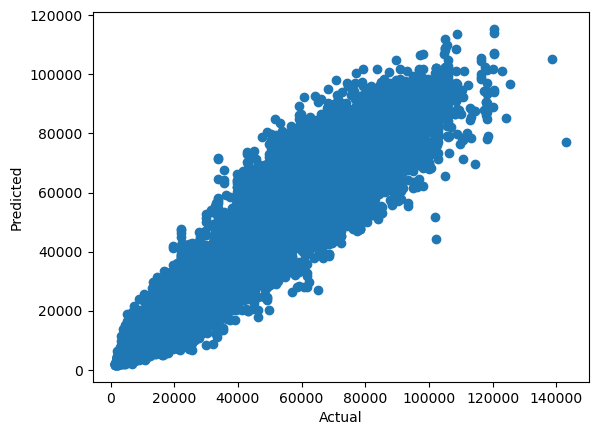

In [19]:
plt.scatter(y_test,rf_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [21]:
rf_pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':rf_pred,'Difference':y_test-rf_pred})
rf_pred_df

,Actual Value,Predicted Value,Difference
218383,7180,8030.44,-850.44
198364,12430,12309.76,120.24
46228,47329,47247.79,81.21
352412,6873,8739.39,-1866.39
209186,21817,16675.95,5141.05
...,...,...,...
27901,5342,5410.35,-68.35
255332,11933,11871.26,61.74
418468,48676,55807.14,-7131.14
187992,5290,5896.31,-606.31


In [18]:
cat_model = CatBoostRegressor(verbose=False).fit(X_train,y_train)
cat_pred = cat_model.predict(X_test)
score = r2_score(y_test, cat_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.03


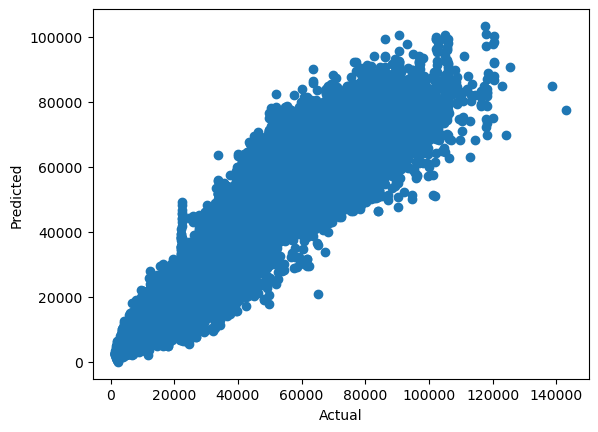

In [20]:
plt.scatter(y_test,cat_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [22]:
cat_pred_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":cat_pred,"Difference": y_test-cat_pred})
cat_pred_df

,Actual Value,Predicted Value,Difference
218383,7180,8470.335706,-1290.335706
198364,12430,13374.947422,-944.947422
46228,47329,48046.663742,-717.663742
352412,6873,9854.924262,-2981.924262
209186,21817,14360.527187,7456.472813
...,...,...,...
27901,5342,6214.052663,-872.052663
255332,11933,11363.693145,569.306855
418468,48676,53931.588868,-5255.588868
187992,5290,6831.666448,-1541.666448
